# 1. Frame the Problem

## Q. How does the company expect to use and benefit from this model? 
NOTE: This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it

### A. My company is NYC99Acres.com. It helps selling properties. This will help putting a sale price of the property, based on the trends observed. So that its not too much that people wont buy and so less that we wont make any profit.

## Q. The next question to ask is what the current solution looks like (if any). 
NOTE: It will often give you a reference performance, as well as insights on how to solve the problem

### A. Currently it is done manually by some experts. This is costly and time-consuming. And their estimates are often off by 20%. The NYC sales data looks great and we can exploit for our purpose.

## Q. Is it supervised, unsupervised, or Reinforcement Learning? 

### A. Supervised

## Q. Is it a classification task, a regression task, or something else? 

### A. Regression

## Q. Should you use batch learning or online learning techniques? 

### A. Batch learning. As the data is not changing drastically. If wee see a huge change with time we will think of online.

## Q. What should be the performance measure ?

NOTE: The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

### *A. Based on the viewing data we will decide for this.*

# 2. Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data: https://www.kaggle.com/new-york-city/nyc-property-sales

In [2]:
df = pd.read_csv("./Datasets/nyc-rolling-sales.csv")

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
[print(i) for i in df.columns]

Unnamed: 0
BOROUGH
NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BLOCK
LOT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
ZIP CODE
RESIDENTIAL UNITS
COMMERCIAL UNITS
TOTAL UNITS
LAND SQUARE FEET
GROSS SQUARE FEET
YEAR BUILT
TAX CLASS AT TIME OF SALE
BUILDING CLASS AT TIME OF SALE
SALE PRICE
SALE DATE


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [5]:
df=df.drop(["Unnamed: 0"], axis=1)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [6]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [8]:
df.BOROUGH.dtypes

dtype('int64')

In [9]:
df.NEIGHBORHOOD.dtypes == object

True

In [10]:
# Wanna check if any column is categories 

[(len(df[col].value_counts()),col) for col in df.columns if df[col].dtypes == object]

[(254, 'NEIGHBORHOOD'),
 (47, 'BUILDING CLASS CATEGORY'),
 (11, 'TAX CLASS AT PRESENT'),
 (1, 'EASE-MENT'),
 (167, 'BUILDING CLASS AT PRESENT'),
 (67563, 'ADDRESS'),
 (3989, 'APARTMENT NUMBER'),
 (6062, 'LAND SQUARE FEET'),
 (5691, 'GROSS SQUARE FEET'),
 (166, 'BUILDING CLASS AT TIME OF SALE'),
 (10008, 'SALE PRICE'),
 (364, 'SALE DATE')]

**NOTE: From the names 'BUILDING CLASS CATEGORY' 'TAX CLASS AT PRESENT' 'BUILDING CLASS AT PRESENT' 'BUILDING CLASS AT TIME OF SALE' looks like categories**

Need to check for NEIGHBORHOOD

In [11]:
df.NEIGHBORHOOD.value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
PELHAM BAY                     1
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

**NEIGHBORHOOD also looks like a category**

In [12]:
df.BOROUGH.value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [13]:
#Even BOROUGH seems like categories. So its not that object type columns will be categories only
[(len(df[col].value_counts()),col) for col in df.columns ]

[(5, 'BOROUGH'),
 (254, 'NEIGHBORHOOD'),
 (47, 'BUILDING CLASS CATEGORY'),
 (11, 'TAX CLASS AT PRESENT'),
 (11566, 'BLOCK'),
 (2627, 'LOT'),
 (1, 'EASE-MENT'),
 (167, 'BUILDING CLASS AT PRESENT'),
 (67563, 'ADDRESS'),
 (3989, 'APARTMENT NUMBER'),
 (186, 'ZIP CODE'),
 (176, 'RESIDENTIAL UNITS'),
 (55, 'COMMERCIAL UNITS'),
 (192, 'TOTAL UNITS'),
 (6062, 'LAND SQUARE FEET'),
 (5691, 'GROSS SQUARE FEET'),
 (158, 'YEAR BUILT'),
 (4, 'TAX CLASS AT TIME OF SALE'),
 (166, 'BUILDING CLASS AT TIME OF SALE'),
 (10008, 'SALE PRICE'),
 (364, 'SALE DATE')]

In [14]:
df["SALE PRICE"]

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

**SALE PRICE column is object but it should be numer. Lets convert it**

In [15]:
df["SALE PRICE"].astype('int', errors="ignore")

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [16]:
import re

# No of sale price row which are numbers
len([price for price in df["SALE PRICE"] if re.match("(\d)+", price.strip())])

69987

In [17]:
# No of sale price row which are not numbers
len([price for price in df["SALE PRICE"] if not re.match("(\d)+", price.strip())])

14561

In [18]:
int("23")

23

In [19]:
def numOrNan(x):
    if re.match("(\d)+", x.strip()):
        return float(x)
    else:
        return np.nan
df["SALE PRICE"]=df["SALE PRICE"].apply(numOrNan)
df["SALE PRICE"]

0         6625000.0
1               NaN
2               NaN
3         3936272.0
4         8000000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 84548, dtype: float64

In [20]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,6.998700e+04
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.276456e+06
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,2.250000e+05
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,5.300000e+05
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,9.500000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


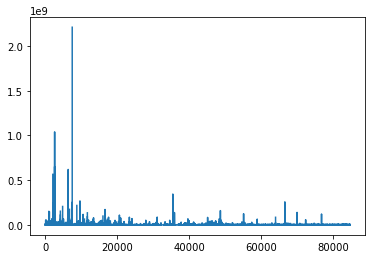

In [21]:
df["SALE PRICE"].plot()
plt.show()

<AxesSubplot:>

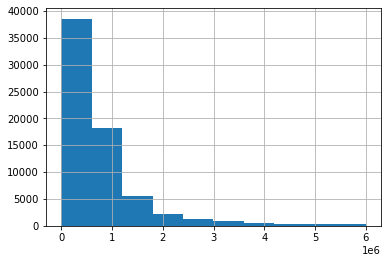

In [22]:
df[df["SALE PRICE"] < 6.000000e+06 ]["SALE PRICE"].hist()

In [23]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

## 2. Create Test Set

**Method 1: Randomly select test and train set based on the ratio**

In [24]:
len(df)

84548

In [25]:
def split_test_train(df, test_ratio):
    rand_indices = np.random.permutation(len(df))
    test_num = int(test_ratio * len(df))
    test_set = df.loc[list(rand_indices[:test_num])]
    train_set= df.loc[list(rand_indices[test_num:])]
    return test_set, train_set

In [26]:
test_set, train_set = split_test_train(df, test_ratio=0.2)
len(test_set), len(train_set)

(16909, 67639)

**Method 2: CRC based**

In [27]:
from zlib import crc32

In [28]:
df.index

RangeIndex(start=0, stop=84548, step=1)

In [29]:
def checkCRC(index, test_ratio):
    return crc32(np.int64(index)) < (test_ratio * 2**32)

In [30]:
def crc_split_test_train(df, test_ratio, index):
    ids = df[index]
    test_ids = ids.apply(lambda x: checkCRC(x,test_ratio))
    return df[test_ids], df[~test_ids]
        

In [31]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [32]:
#Adding an index to the df. COlumn name will be "index"
df = df.reset_index()
df.columns

Index(['index', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [33]:
test_set, train_set = crc_split_test_train(df,0.2,"index")
len(test_set), len(train_set)

(16909, 67639)

### Visualize the data

### Looking for correlation

#### Looking for Correlations

In [34]:
corr_matrix = df.corr()

In [35]:
corr_matrix

,index,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
index,1.000000,0.956227,0.426810,-0.257598,0.224556,-0.025638,-0.005724,-0.025574,0.102361,-0.294673,-0.068230
BOROUGH,0.956227,1.000000,0.417001,-0.277848,0.256564,-0.023229,-0.005503,-0.023346,0.108303,-0.315163,-0.074418
BLOCK,0.426810,0.417001,1.000000,-0.229118,0.234063,-0.015628,-0.003517,-0.015888,0.071262,-0.287300,-0.061139
LOT,-0.257598,-0.277848,-0.229118,1.000000,-0.145802,-0.034303,-0.010953,-0.033169,-0.289463,0.296680,0.012324
ZIP CODE,0.224556,0.256564,0.234063,-0.145802,1.000000,0.005578,0.000726,0.005415,0.330708,-0.142915,-0.034170
RESIDENTIAL UNITS,-0.025638,-0.023229,-0.015628,-0.034303,0.005578,1.000000,0.015653,0.888309,0.025380,-0.001074,0.119698
COMMERCIAL UNITS,-0.005724,-0.005503,-0.003517,-0.010953,0.000726,0.015653,1.000000,0.472998,0.006428,0.049586,0.046006
TOTAL UNITS,-0.025574,-0.023346,-0.015888,-0.033169,0.005415,0.888309,0.472998,1.000000,0.024568,0.026429,0.125101
YEAR BUILT,0.102361,0.108303,0.071262,-0.289463,0.330708,0.025380,0.006428,0.024568,1.000000,-0.187609,-0.003539
TAX CLASS AT TIME OF SALE,-0.294673,-0.315163,-0.287300,0.296680,-0.142915,-0.001074,0.049586,0.026429,-0.187609,1.000000,0.091352


In [36]:
corr_matrix["SALE PRICE"].sort_values(ascending=False)

SALE PRICE                   1.000000
TOTAL UNITS                  0.125101
RESIDENTIAL UNITS            0.119698
TAX CLASS AT TIME OF SALE    0.091352
COMMERCIAL UNITS             0.046006
LOT                          0.012324
YEAR BUILT                  -0.003539
ZIP CODE                    -0.034170
BLOCK                       -0.061139
index                       -0.068230
BOROUGH                     -0.074418
Name: SALE PRICE, dtype: float64

array([[<AxesSubplot:xlabel='SALE PRICE', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='TOTAL UNITS', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='SALE PRICE'>,
        <AxesSubplot:xlabel='BOROUGH', ylabel='SALE PRICE'>],
       [<AxesSubplot:xlabel='SALE PRICE', ylabel='TOTAL UNITS'>,
        <AxesSubplot:xlabel='TOTAL UNITS', ylabel='TOTAL UNITS'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='TOTAL UNITS'>,
        <AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='TOTAL UNITS'>,
        <AxesSubplot:xlabel='BOROUGH', ylabel='TOTAL UNITS'>],
       [<AxesSubplot:xlabel='SALE PRICE', ylabel='RESIDENTIAL UNITS'>,
        <AxesSubplot:xlabel='TOTAL UNITS', ylabel='RESIDENTIAL UNITS'>,
        <AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='RESIDENTIAL UNITS'>,
        <AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='RESIDENTIAL UNITS'>,
      

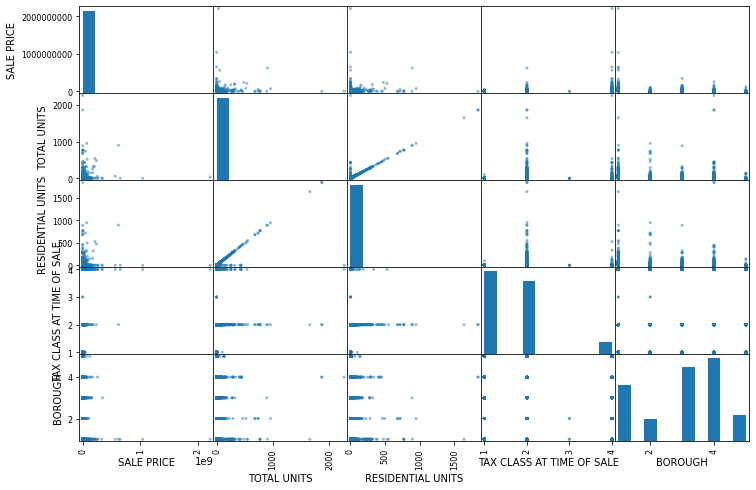

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["SALE PRICE", "TOTAL UNITS", "RESIDENTIAL UNITS", "TAX CLASS AT TIME OF SALE", "BOROUGH"]

scatter_matrix(df[attributes], figsize=(12,8))

### Experimenting with Attribute Combination

In [38]:
df.columns

Index(['index', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Data Cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [40]:
def numUnique(df):
    return [(df[col].nunique(dropna=True), col)  for col in df.columns]

In [41]:
numUnique(df)

[(84548, 'index'),
 (5, 'BOROUGH'),
 (254, 'NEIGHBORHOOD'),
 (47, 'BUILDING CLASS CATEGORY'),
 (11, 'TAX CLASS AT PRESENT'),
 (11566, 'BLOCK'),
 (2627, 'LOT'),
 (1, 'EASE-MENT'),
 (167, 'BUILDING CLASS AT PRESENT'),
 (67563, 'ADDRESS'),
 (3989, 'APARTMENT NUMBER'),
 (186, 'ZIP CODE'),
 (176, 'RESIDENTIAL UNITS'),
 (55, 'COMMERCIAL UNITS'),
 (192, 'TOTAL UNITS'),
 (6062, 'LAND SQUARE FEET'),
 (5691, 'GROSS SQUARE FEET'),
 (158, 'YEAR BUILT'),
 (4, 'TAX CLASS AT TIME OF SALE'),
 (166, 'BUILDING CLASS AT TIME OF SALE'),
 (10007, 'SALE PRICE'),
 (364, 'SALE DATE')]

**As column "EASEMENT" has only 1 value. We can drop that**

In [42]:
df_eas_drop = df.drop("EASE-MENT", axis=1)
df_eas_drop.columns

Index(['index', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [43]:
df_eas_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

Both are Object: LAND SQUARE FEET, GROSS SQUARE FEET 
But they should be numbers. Lets convert

In [44]:
df["LAND SQUARE FEET"].nunique(dropna=True),df["LAND SQUARE FEET"].value_counts()

(6062,
  -        26252
 0         10326
 2000       3919
 2500       3470
 4000       3044
           ...  
 3771          1
 12825         1
 5233          1
 753           1
 168510        1
 Name: LAND SQUARE FEET, Length: 6062, dtype: int64)

In [45]:
df["GROSS SQUARE FEET"].nunique(dropna=True),df["GROSS SQUARE FEET"].value_counts()

(5691,
  -       27612
 0        11417
 2400       386
 1800       361
 2000       359
          ...  
 6248         1
 4554         1
 54792        1
 10840        1
 16125        1
 Name: GROSS SQUARE FEET, Length: 5691, dtype: int64)

In [64]:
#How to create a blank dataframe
df_test = pd.DataFrame()
df_test

""


In [57]:
df_test["Col 1"] = [1,2,3,4,5]
df_test

,Col 1
0,1
1,2
2,3
3,4
4,5


In [62]:
def NanOrNot1(x):
    if re.match('(\d)+', x.strip()):
        return int(x.strip())
    else:
        np.nan
def convertObjectColumnsToNum(df, cols):
    df_ret = pd.DataFrame()
    for col in cols:
        df_ret[col] = df[col].apply(NanOrNot1)
    return df_ret

    

In [63]:
convertObjectColumnsToNum(df, ["LAND SQUARE FEET","GROSS SQUARE FEET"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAND SQUARE FEET   58296 non-null  float64
 1   GROSS SQUARE FEET  56936 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [65]:
df_eas_drop[["LAND SQUARE FEET","GROSS SQUARE FEET"]] = convertObjectColumnsToNum(df, ["LAND SQUARE FEET","GROSS SQUARE FEET"])
df_eas_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

**SALE_PRICE, LAND SQUARE FEET, GROSS SQUARE FEET has lot of NAN values: We will replace them by medians**

- One way to do that

In [68]:
median_sal_price = df_eas_drop["SALE PRICE"].median()
df_eas_drop["SALE PRICE"].fillna(median_sal_price, inplace=True)


AttributeError: 'Series' object has no attribute 'info'

In [70]:
df_eas_drop.info()
# See sale price is all not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

- Way 2

sklearn also provides an option which does the same for all the columns

In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#Above workks for numbers column only so pass a dataframe with no text columns
df_eas_drop_num = df_eas_drop.drop(["NEIGHBORHOOD","BUILDING CLASS CATEGORY","TAX CLASS AT PRESENT","BUILDING CLASS AT PRESENT","ADDRESS","APARTMENT NUMBER","BUILDING CLASS AT TIME OF SALE","SALE DATE"], axis=1)
imputer.fit(df_eas_drop_num)



SimpleImputer(strategy='median')

In [72]:
imputer.statistics_

array([4.22735e+04, 3.00000e+00, 3.31100e+03, 5.00000e+01, 1.12090e+04,
       1.00000e+00, 0.00000e+00, 1.00000e+00, 2.32500e+03, 1.68000e+03,
       1.94000e+03, 2.00000e+00, 5.30000e+05])

In [75]:
df_eas_drop_num.median().values

array([4.22735e+04, 3.00000e+00, 3.31100e+03, 5.00000e+01, 1.12090e+04,
       1.00000e+00, 0.00000e+00, 1.00000e+00, 2.32500e+03, 1.68000e+03,
       1.94000e+03, 2.00000e+00, 5.30000e+05])

In [73]:
df_eas_drop_num.columns

Index(['index', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'SALE PRICE'],
      dtype='object')

In [76]:
x = imputer.transform(df_eas_drop_num)

In [79]:
df_eas_drop_num_tr = pd.DataFrame(x, columns=df_eas_drop_num.columns)

In [82]:
df_eas_drop_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      84548 non-null  float64
 1   BOROUGH                    84548 non-null  float64
 2   BLOCK                      84548 non-null  float64
 3   LOT                        84548 non-null  float64
 4   ZIP CODE                   84548 non-null  float64
 5   RESIDENTIAL UNITS          84548 non-null  float64
 6   COMMERCIAL UNITS           84548 non-null  float64
 7   TOTAL UNITS                84548 non-null  float64
 8   LAND SQUARE FEET           84548 non-null  float64
 9   GROSS SQUARE FEET          84548 non-null  float64
 10  YEAR BUILT                 84548 non-null  float64
 11  TAX CLASS AT TIME OF SALE  84548 non-null  float64
 12  SALE PRICE                 84548 non-null  float64
dtypes: float64(13)
memory usage: 8.4 MB


In [81]:
df_eas_drop_num_tr.head()

,index,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,0.0,1.0,392.0,6.0,10009.0,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,6625000.0
1,1.0,1.0,399.0,26.0,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,530000.0
2,2.0,1.0,399.0,39.0,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,530000.0
3,3.0,1.0,402.0,21.0,10009.0,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,3936272.0
4,4.0,1.0,404.0,55.0,10009.0,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,8000000.0


In [83]:
df_eas_drop_copy = df_eas_drop.copy()

In [84]:
df_eas_drop_copy[df_eas_drop_num.columns] = df_eas_drop_num_tr

In [86]:
#No null values: Yes
df_eas_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           84548 non-null  float64
 1   BOROUGH                         84548 non-null  float64
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  float64
 6   LOT                             84548 non-null  float64
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  float64
 11  RESIDENTIAL UNITS               84548 non-null  float64
 12  COMMERCIAL UNITS                

In [87]:
df_eas_drop = df_eas_drop_copy.copy()
df_eas_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           84548 non-null  float64
 1   BOROUGH                         84548 non-null  float64
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  float64
 6   LOT                             84548 non-null  float64
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  float64
 11  RESIDENTIAL UNITS               84548 non-null  float64
 12  COMMERCIAL UNITS                

**Till now the number columns cleaning has been doe: Now  lets move to Text and Categorical columns**

**Next read: Scikit-Learn Design**